In [ ]:
import scipy.io # To use the '.mat' files
import seaborn as sns
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
for root, dirs, files in os.walk("/content/drive/MyDrive/0_load_48_KHz", topdown=False):
    for file_name in files:
        path = os.path.join(root, file_name)
        print(path)

/content/drive/MyDrive/0_load_48_KHz/21_OR1.mat
/content/drive/MyDrive/0_load_48_KHz/7_OR3.mat
/content/drive/MyDrive/0_load_48_KHz/7_BA.mat
/content/drive/MyDrive/0_load_48_KHz/21_OR3.mat
/content/drive/MyDrive/0_load_48_KHz/7_OR2.mat
/content/drive/MyDrive/0_load_48_KHz/7_IR.mat
/content/drive/MyDrive/0_load_48_KHz/21_BA.mat
/content/drive/MyDrive/0_load_48_KHz/21_IR.mat
/content/drive/MyDrive/0_load_48_KHz/21_OR2.mat
/content/drive/MyDrive/0_load_48_KHz/7_OR1.mat
/content/drive/MyDrive/0_load_48_KHz/14_OR1.mat
/content/drive/MyDrive/0_load_48_KHz/14_IR.mat
/content/drive/MyDrive/0_load_48_KHz/14_BA.mat
/content/drive/MyDrive/0_load_48_KHz/N.mat


In [ ]:
path = r'/content/drive/MyDrive/0_load_48_KHz/7_OR3.mat'
mat = scipy.io.loadmat(path)

In [ ]:
mat.items()

dict_items([('__header__', b'MATLAB 5.0 MAT-file, Platform: PCWIN, Created on: Fri Jan 28 12:25:53 2000'), ('__version__', '1.0'), ('__globals__', []), ('X161_DE_time', array([[0.328152  ],
       [0.24011631],
       [0.15333231],
       ...,
       [0.16146831],
       [0.235944  ],
       [0.20027077]])), ('X161_FE_time', array([[-0.05156909],
       [ 0.00308182],
       [ 0.07273091],
       ...,
       [ 0.08362   ],
       [ 0.03472182],
       [ 0.05033636]])), ('X161RPM', array([[1796]], dtype=uint16))])

In [ ]:
list(mat.keys())

['__header__',
 '__version__',
 '__globals__',
 'X161_DE_time',
 'X161_FE_time',
 'X161RPM']

In [ ]:
key_name = list(mat.keys())[3]

In [ ]:
DE_data = mat.get(key_name)

In [ ]:
file_name

'N.mat'

In [ ]:
fault = np.full((len(DE_data), 1), file_name[:-4])

In [ ]:
df_temp = pd.DataFrame({'DE_data':np.ravel(DE_data) , 'fault':np.ravel(fault)})

In [ ]:
df_temp

,DE_data,fault
0,0.328152,N
1,0.240116,N
2,0.153332,N
3,0.070303,N
4,-0.000626,N
...,...,...
129964,0.103056,N
129965,0.137686,N
129966,0.161468,N
129967,0.235944,N


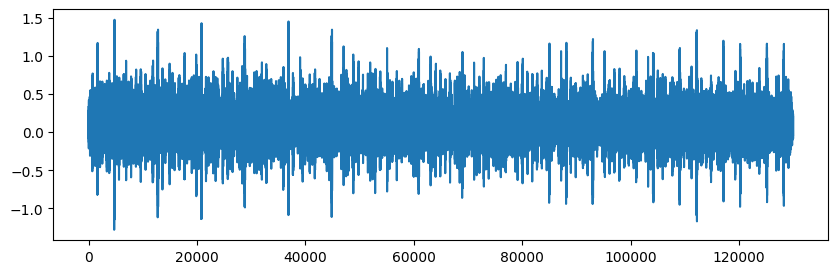

In [ ]:
plt.figure(figsize=(10,3))
plt.plot(df_temp.iloc[:,0])
plt.show()

In [ ]:
df=pd.DataFrame(columns=['DE_data','fault'])

for root, dirs, files in os.walk("/content/drive/MyDrive/0_load_48_KHz", topdown=False):
    for file_name in files:
        path = os.path.join(root, file_name)
        print(path)

        mat = scipy.io.loadmat(path)

        key_name = list(mat.keys())[3]
        DE_data = mat.get(key_name)
        fault = np.full((len(DE_data), 1), file_name[:-4])

        df_temp = pd.DataFrame({'DE_data':np.ravel(DE_data) , 'fault':np.ravel(fault)})

        df = pd.concat([df,df_temp],axis=0)
        print(df['fault'].unique())

df.to_csv('all_faults.csv',index=False)

/content/drive/MyDrive/0_load_48_KHz/21_OR1.mat
['21_OR1']
/content/drive/MyDrive/0_load_48_KHz/7_OR3.mat
['21_OR1' '7_OR3']
/content/drive/MyDrive/0_load_48_KHz/7_BA.mat
['21_OR1' '7_OR3' '7_BA']
/content/drive/MyDrive/0_load_48_KHz/21_OR3.mat
['21_OR1' '7_OR3' '7_BA' '21_OR3']
/content/drive/MyDrive/0_load_48_KHz/7_OR2.mat
['21_OR1' '7_OR3' '7_BA' '21_OR3' '7_OR2']
/content/drive/MyDrive/0_load_48_KHz/7_IR.mat
['21_OR1' '7_OR3' '7_BA' '21_OR3' '7_OR2' '7_IR']
/content/drive/MyDrive/0_load_48_KHz/21_BA.mat
['21_OR1' '7_OR3' '7_BA' '21_OR3' '7_OR2' '7_IR' '21_BA']
/content/drive/MyDrive/0_load_48_KHz/21_IR.mat
['21_OR1' '7_OR3' '7_BA' '21_OR3' '7_OR2' '7_IR' '21_BA' '21_IR']
/content/drive/MyDrive/0_load_48_KHz/21_OR2.mat
['21_OR1' '7_OR3' '7_BA' '21_OR3' '7_OR2' '7_IR' '21_BA' '21_IR' '21_OR2']
/content/drive/MyDrive/0_load_48_KHz/7_OR1.mat
['21_OR1' '7_OR3' '7_BA' '21_OR3' '7_OR2' '7_IR' '21_BA' '21_IR' '21_OR2'
 '7_OR1']
/content/drive/MyDrive/0_load_48_KHz/14_OR1.mat
['21_OR1' '7_O

In [ ]:
df = pd.read_csv('/content/all_faults.csv')

In [ ]:
df

,DE_data,fault
0,0.013355,21_OR1
1,-0.345552,21_OR1
2,-0.693608,21_OR1
3,-0.966544,21_OR1
4,-1.109272,21_OR1
...,...,...
2782624,-0.059664,N
2782625,-0.063836,N
2782626,-0.034630,N
2782627,0.016689,N


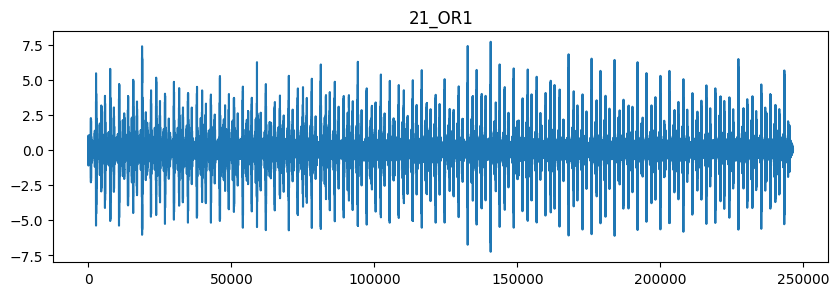

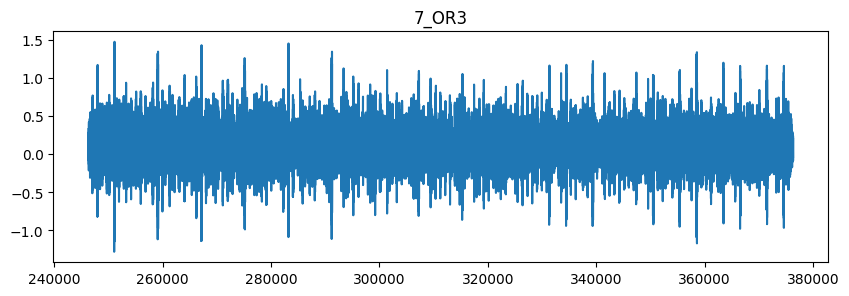

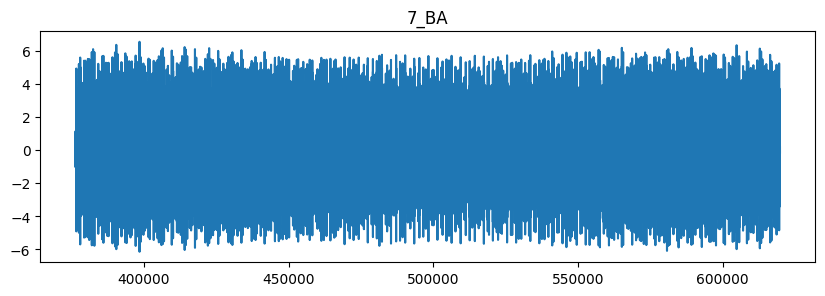

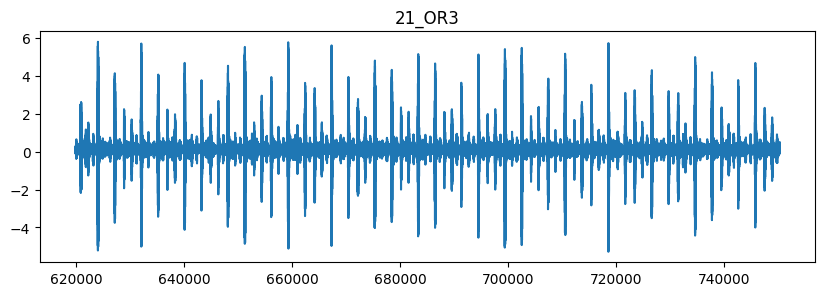

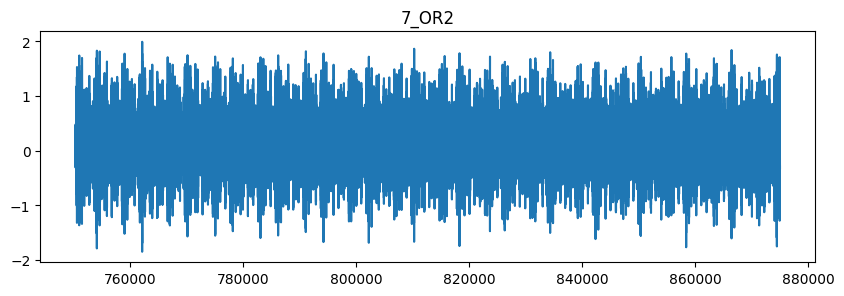

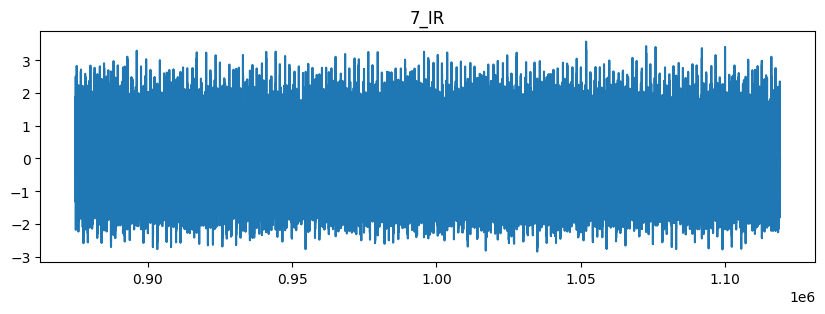

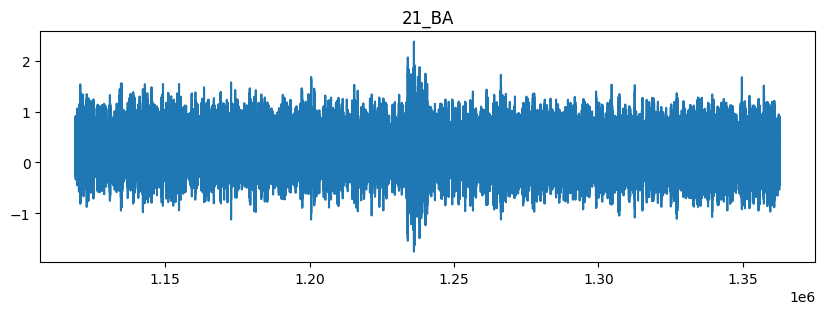

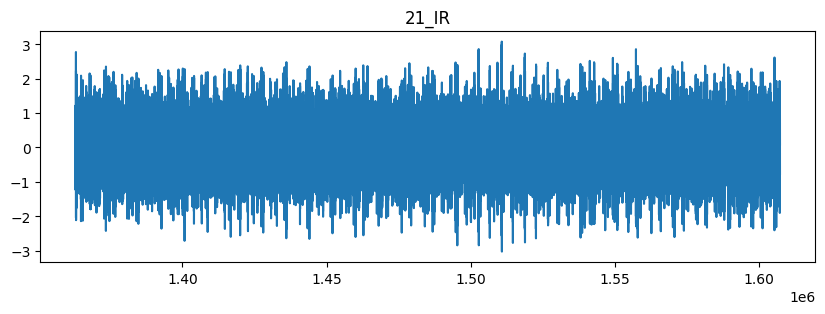

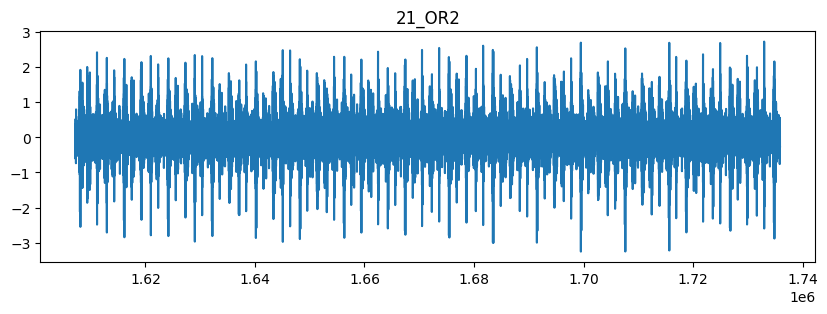

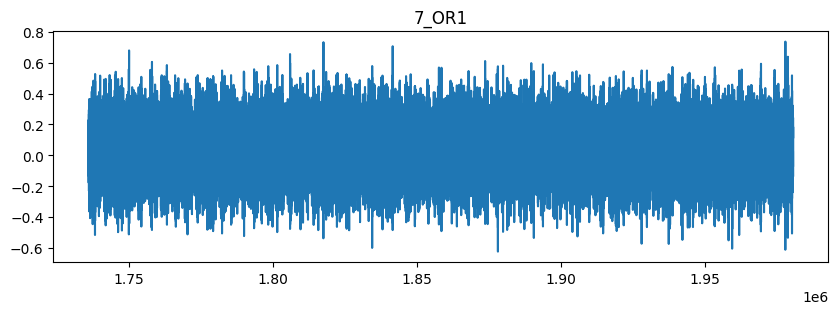

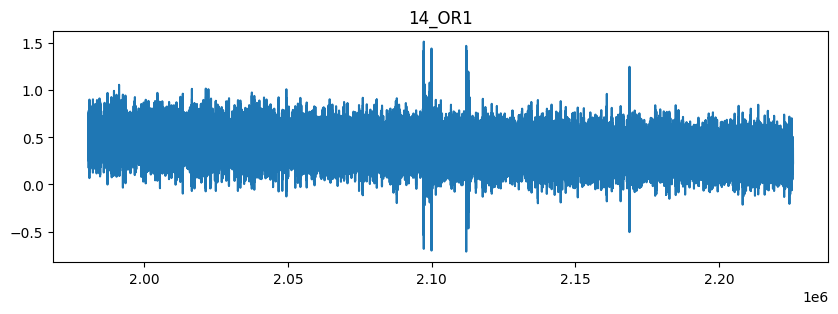

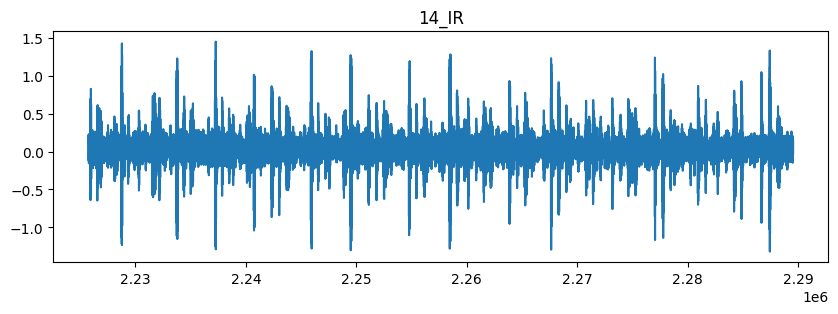

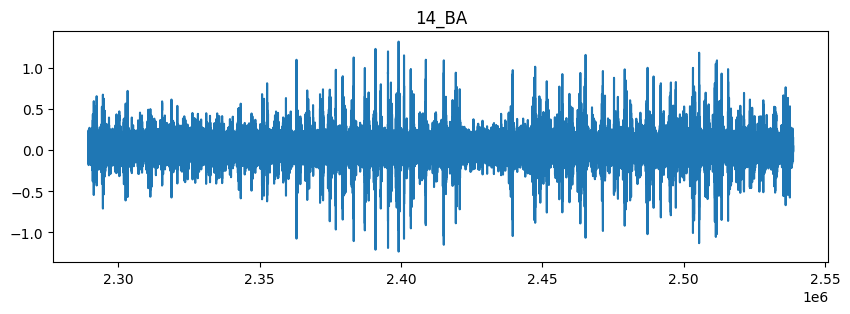

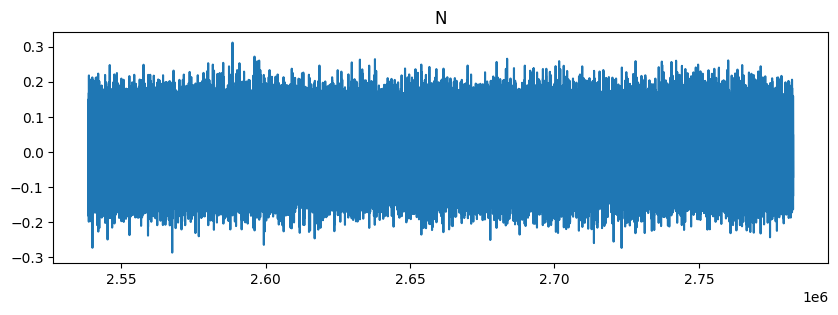

In [ ]:
faults = df['fault'].unique()
for  f in faults:
    plt.figure(figsize=(10,3))
    plt.plot(df[df['fault']==f].iloc[:,0])
    plt.title(f)
    plt.show()

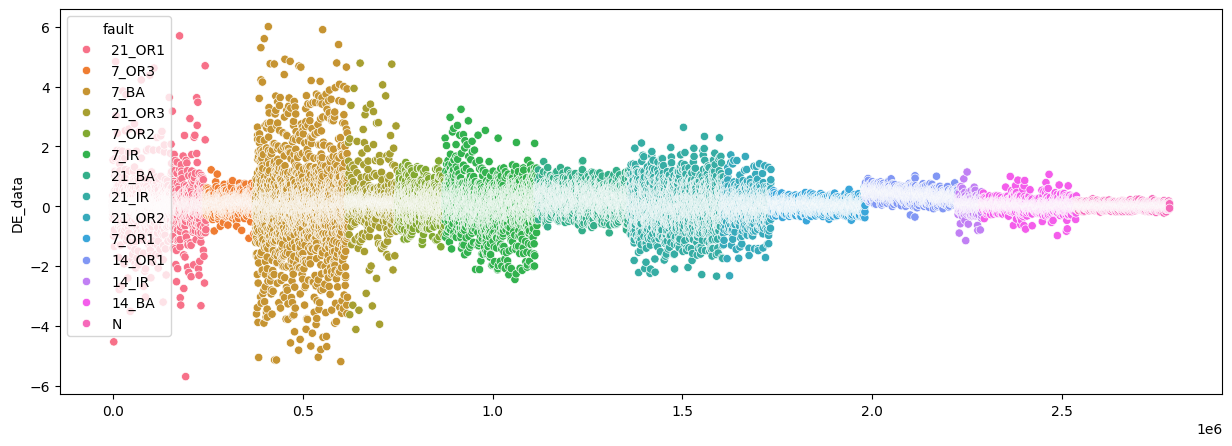

In [ ]:
plt.figure(figsize=(15,5))
sns.scatterplot(data=df.iloc[::100,:],y='DE_data',x=np.arange(0,len(df),100),hue='fault')
plt.show()